<a href="https://colab.research.google.com/github/jacks-li/T13-CHL5230-F23-DT1/blob/main/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHL5230 Datathon 1 - Team 13**

**Topic: Public Health Factors Influencing BMI**

**Team Members:** Gemma Postill, Rebecca Lee, Jack Li

---

**Research Question**

1. Are there distinct subtypes of obesity influenced by lifestyle factors?
2. What modifiable risk factors of obesity are present within each subtype, identifying groups for targeted public health intervention?

---

**Analysis Plan**

To determine how risk factors of BMI cluster together and create distinct obesity phenotypes, we will use unsupervised machine learning.

- Filter data to only include BMI ≥ 30.0 (obese)
- Remove non-modifiable factors influencing BMI (age, gender)
- Use KMeans clustering and determine optimal number of clusters using elbow method.
- Split the data into testing and training to develop and evaluate our model.
- Use F1 scores, recall, and precision to evaluate how our clusters perform on the testing data.
- Conduct a descriptive analysis of the clusters to determine the modifiable and non-modifiable risk factors within each group.


In [ ]:
import pandas as pd
import io

from google.colab import files
#uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
# Uploaded dataset as part of notebook, no need to upload -> file not found error when I try to run cell without uploading
df = pd.read_csv("CHL5230-F23-Datathon #1-Dataset1.csv")

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
# For adults 20 and older, adults with BMI >= 30.0 are considered obsese (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

#print (df.columns)


# Filtering data to only include age >= 20.
df = df.loc[(df["Age"]>=20)]

# assign weight class Obese: 0, Overweight: 1, Normal: 2, Under:3
def assign_weight_class(bmi):
  if bmi >=30:
   return 0
  elif bmi >=25:
   return 1
  elif bmi >=18.5:
   return 2
  else:
   return 3

df['WeightClass'] = df['BMI'].apply(assign_weight_class)


# Removing non-modifiable factors: Age, Gender
modifiable_subset = df[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI', 'WeightClass']]

modifiable_subset



<ipython-input-6-c974ab05a11e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WeightClass'] = df['BMI'].apply(assign_weight_class)


,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,WeightClass
0,3091,90,160,4,1,1.569070,81.199394,32.981343,0
1,2090,106,27,0,9,1.629449,74.273566,27.973877,1
2,2938,11,45,2,3,1.637726,71.453466,26.640417,1
3,3022,48,112,1,8,1.514198,98.163045,42.813720,0
4,2350,83,115,0,7,1.410559,57.323914,28.810685,1
...,...,...,...,...,...,...,...,...,...
23530,2858,65,37,1,9,1.774514,56.917788,18.075460,3
23531,2573,27,27,1,1,1.677173,57.277270,20.362283,2
23532,2246,37,44,0,3,1.661042,80.314959,29.109537,1
23533,1588,24,101,4,7,1.577156,43.365424,17.433880,3


[[423 351 376  39]
 [458 365 408  43]
 [538 446 458  51]
 [213 177 194  19]]
              precision    recall  f1-score   support

           0       0.26      0.36      0.30      1189
           1       0.27      0.29      0.28      1274
           2       0.32      0.31      0.31      1493
           3       0.12      0.03      0.05       603

    accuracy                           0.28      4559
   macro avg       0.24      0.25      0.24      4559
weighted avg       0.26      0.28      0.27      4559



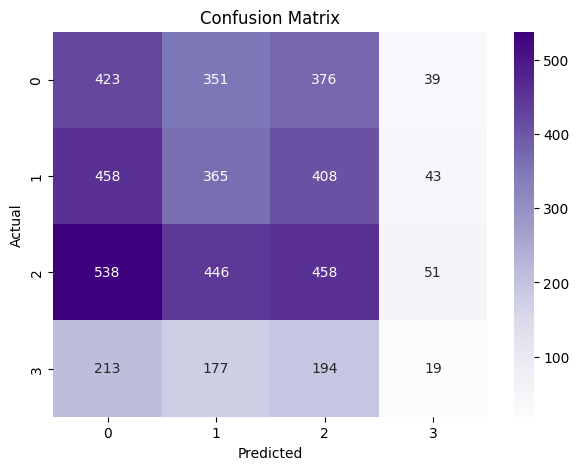

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data into features and label
X = modifiable_subset[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']] #add or subtract any features from list

# removed sugar intake to see if it improves accuracy
#X = modifiable_subset[['Calorie_Intake','Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]

y = modifiable_subset[['WeightClass']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 3 as an example
knn.fit(X_train, y_train.values.ravel())

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = modifiable_subset['WeightClass'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Max f1 score = 0.28; k = 42
Max precision = 0.28; k = 1
Max recall = 0.31; k = 48


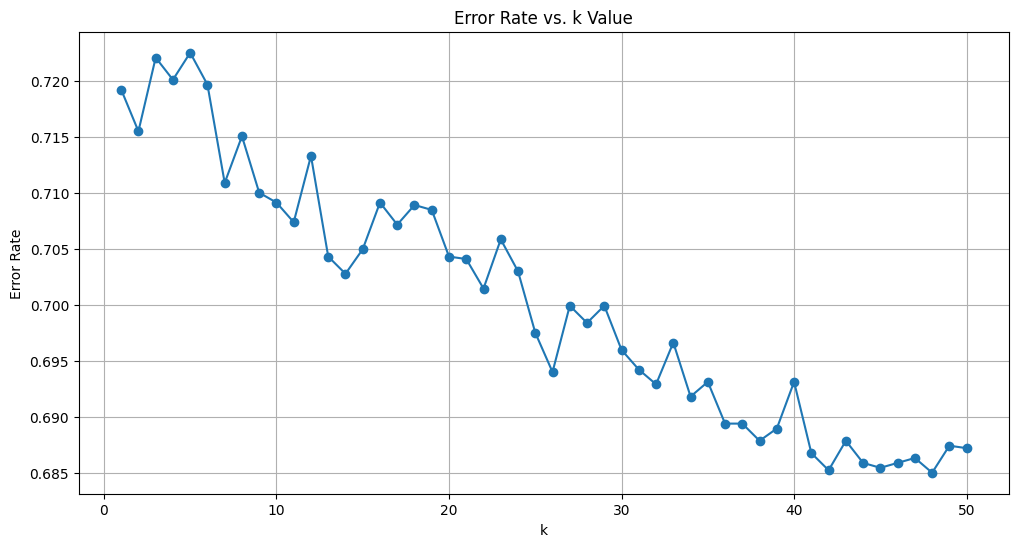

In [ ]:
# Elbow method to determine optimal k

import numpy as np
from sklearn.metrics import accuracy_score

# Choose a range of k values to test. In this case, we'll test values from 1 to
k_values = range(1, 51)

# A list to keep track of the error rates, f1-score, precision, recall for each k value.
errors = []
f1_score = []
precision = []
recall = []
accuracy = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train.values.ravel()) # .ravel() to flatten array to proper shape

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

    # classification report to calculate f1 score at each k
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score.append(report['weighted avg']['f1-score'])
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])

print("Max f1 score = {}; k = {}".format(np.max(f1_score).round(2), f1_score.index(np.max(f1_score))+1 ))
print("Max precision = {}; k = {}".format(np.max(precision).round(2), precision.index(np.max(precision))+1 ))
print("Max recall = {}; k = {}".format(np.max(recall).round(2), recall.index(np.max(recall))+1 ))

# Plotting Errors
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [ ]:
## K-means on only BMI >= 30

obese_subset = df.loc[ (df['Age']>=20) & (df['BMI']>=30.0)]
obese_subset = obese_subset[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI', 'WeightClass']]

obese_subset.head()

,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,WeightClass
0,3091,90,160,4,1,1.569070,81.199394,32.981343,0
3,3022,48,112,1,8,1.514198,98.163045,42.813720,0
10,1827,19,57,4,5,1.568974,82.628709,33.565994,0
12,3165,112,55,2,10,1.548177,82.564952,34.447263,0
14,3077,102,144,0,1,1.477826,72.695218,33.285836,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


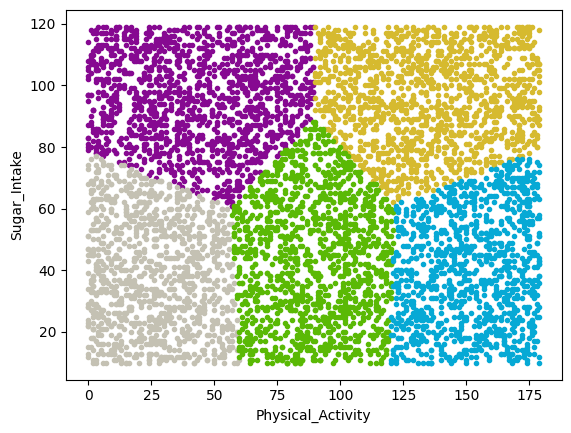

In [ ]:
# Required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3', '#5AB905', '#06A9D5']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i], marker=".")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    # Display the plot
    plt.show()

# Choose two features, 'bmi' and 'charges', for clustering and visualization
features = ['Physical_Activity', 'Sugar_Intake']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  obese_subset[features].to_numpy()

# Apply k-means clustering on the [raw] data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=5, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


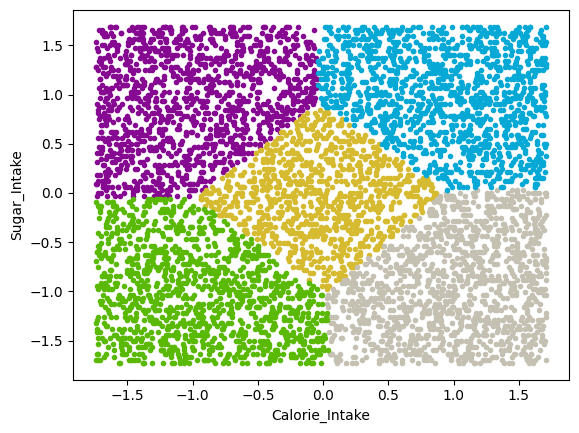

In [ ]:
# Required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3', '#5AB905', '#06A9D5']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i], marker=".")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    # Display the plot
    plt.show()

# Choose two features, 'bmi' and 'charges', for clustering and visualization
features = ['Calorie_Intake', 'Sugar_Intake']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  obese_subset[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the [raw] data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=5, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 1.00703157  1.41077317 -1.29582049  1.        ]
 [ 0.88777169 -0.72757298  0.74303174  4.        ]
 [-1.17767104  1.41077317 -0.13076207  3.        ]
 ...
 [-0.27890098  1.41077317 -0.42202668  3.        ]
 [ 1.00875997 -0.01479093  0.74303174  4.        ]
 [-1.4663145  -0.72757298 -1.29582049  2.        ]]


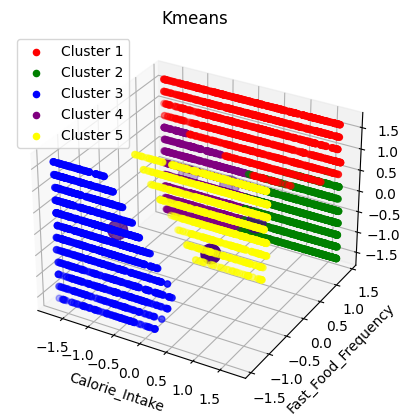

In [ ]:

# Choose two features, 'bmi' and 'charges', for clustering and visualization
features = ['Calorie_Intake', 'Fast_Food_Frequency', 'Screen_Time']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  obese_subset[features].to_numpy()
# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)
kmeans = KMeans(n_clusters=5, random_state=0)
label = kmeans.fit_predict(data)

label = label.reshape(-1,1)

datax = np.append(data, label, axis=1)
print(datax)
data1 = datax[datax[:,3]==0]
data2 = datax[datax[:,3]==1]
data3 = datax[datax[:,3]==2]
data4 = datax[datax[:,3]==3]
data5 = datax[datax[:,3]==4]

kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
#kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1[:,0], data1[0,1], data1[:,2], c='red', label = 'Cluster 1')
kplot.scatter3D(data2[:,0], data2[0,1], data2[:,2],c ='green', label = 'Cluster 2')
kplot.scatter3D(data3[:,0], data3[0,1], data3[:,2], c='blue', label = 'Cluster 3')
kplot.scatter3D(data4[:,0], data4[0,1], data4[:,2],c ='purple', label = 'Cluster 4')
kplot.scatter3D(data5[:,0], data5[0,1], data5[:,2], c='yellow', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.xlabel(features[0])
plt.ylabel(features[1])

plt.title("Kmeans")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data,label)
print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.27124142723702716


In [ ]:
# SECOND APPROACH TO CLUSTERING THE DATA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


#   DEFINING FUNCTIONS

# 1) Obesity Categories
# assign weight class Obese: 0, Overweight: 1, Normal: 2, Under:3
# For adults 20 and older, adults with BMI >= 30.0 are considered obsese (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
def assign_weight_class(bmi):
  if bmi >=30:
   return 0
  elif bmi >=25:
   return 1
  elif bmi >=18.5:
   return 2
  else:
   return 3


# 2) Defining a function to visualize the results of our analysis
def plot_clusters(x, labels, k):
    colors = ['gold','seagreen', 'teal','skyblue' 'slategrey','royalblue','indigo','violet','red','peru']
    for i in range(k):
        filtered_label0 = x[labels == i]
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])



#   IMPORTING DATA

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('CHL5230-F23-Datathon1-Dataset1.csv') #Note I am in the right working directory already (data and py file save together)


# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

#Assessing datframe columns
print(df.columns)


#   DATA CLEANING

# Filtering data to only include age >= 20.
df = df.loc[(df["Age"]>=20)]

#Creating obesity category variable
df['WeightClass'] = df['BMI'].apply(assign_weight_class)

#Turning Gender into 0:Male, and 1:Female
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)


#   DATA VISUALIZATION
features = ['BMI', 'Age']
df[features].plot.scatter(x=features[0], y=features[1], color='#860991')
#plt.show()

# Countplot to visualize the distribution of the three species
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='WeightClass')
plt.title("Distribution of Weight Classes")
#plt.show()

# Pairplot to visualize relationships between different features
sns.pairplot(df, hue='WeightClass', markers=["o", "s", "D","X"])
plt.suptitle("Pairwise Plots of Iris Features by Species", y=1.02)
plt.show()


#   CLUSTERING OBESITY SUBTYPES
df_cluster = df[df['WeightClass'] ==0] ##Subsetting to only those obese

# Feature Selection -- note: Removing weight and height for collinearity with BMI
df_cluster = df_cluster[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'BMI', 'Gender', 'Age']]

# Initialize an empty list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for different values of k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()



#FINAL CLUSTERING MODEL

#Kmean clustering
kmeans = KMeans(n_clusters=4, random_state=42) #setting the clustering parameters
cluster_labels = kmeans.fit_predict(df_cluster) #Fitting the model to the data

#Identifying the labels of the cluster
df_cluster['Cluster'] = cluster_labels
grouped_data = df_cluster.groupby('Cluster')

#Descriptive approach to the clusters
cluster_statistics = grouped_data.describe()
cluster_statistics = cluster_statistics.transpose() #Flipping so that clusters are the columns


#Plot 1:
# Reduce data to 2 principal components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_cluster)

# Plot the reduced data with cluster colors
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA)')
plt.show()

#Plot 2:
tsne = TSNE(n_components=2, perplexity=40, random_state=0)
tsne_result = tsne.fit_transform(df_cluster)

# Create a scatter plot of t-SNE results colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clusters (t-SNE Dimensionality Reduction)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


#Plot 3: pairwise scatter plots
feature_subset = df_cluster[['Screen_Time', 'Physical_Activity', 'Calorie_Intake']] # Select a subset of features
scatter_matrix(feature_subset, c=cluster_labels, figsize=(10, 10), marker='o', hist_kwds={'bins': 20})
plt.show()

FileNotFoundError: ignored